In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [2]:
from textblob_de import TextBlobDE as TextBlob
lines = open('2016_02_23-grundsatzprogrammentwurf.txt').readlines()

In [3]:
# cleanup (convert \n to space and strip out line numbers)
def cleanup(line):
    l = line.replace('\n', ' ')
    try:
        int(l.strip())
        return ''
    except ValueError:
        return l
text = ''.join([cleanup(l) for l in lines])

In [4]:
blob = TextBlob(text)
lemmatized = blob.words.lemmatize()

In [10]:
from wordcloud import WordCloud

def get_wc(wordlist, stop):
    wc_text = ' '.join([w.lower() for w in wordlist if w.lower() not in stop])
    wc = WordCloud().generate(wc_text)
    plt.imshow(wc)

In [ ]:
stop = [w.replace('\n', '') for w in open('stopwords_afd.txt').readlines()]
get_wc(lemmatized, stop)

# design word cloud

In [4]:
from PIL import Image
import numpy as np
from wordcloud import ImageColorGenerator

In [50]:
mask = np.array(Image.open('afd.png'))
coloring = ImageColorGenerator(mask)
text = ' '.join([w.lower() for w in lemmatized])

In [74]:
wc = WordCloud(background_color="white", stopwords=list(stop)+['jed',], color_func=coloring, width=800, height=600)

In [75]:
wc.generate(text)

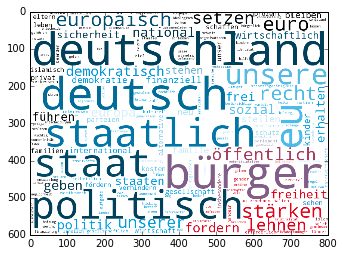

In [76]:
plt.imshow(wc)

In [77]:
wc.to_file('afd_cloud.jpg')